# Numerically Solving Ordinary Differential Equations with Python

How would you solve *any* differential equation numerically, not only those that can be expressed as an eigen equation?

There are some nice numerical tools available in the SciPy package for Python to help you with such problems. You can find more from:
* [odeint: the manual pages.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) 
* [odeint: A longer explanation from NYU](http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html)
* [An example for the coupled spring mass system from the Scipy Cookbook](http://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html)
* And the occasional diff eq has an exact solution, [so you could use SymPy](http://www.scipy-lectures.org/advanced/sympy.html) see bottom of page

If you wouls like to know how all this works under the hood, which you should, a good source is the book [Numerical Recipes in C, Chapter 16](https://www.fing.edu.uy/if/cursos/fiscomp/extras/numrec/book/f16.pdf). You coule easily implement those algorithms in Python or Java as well.

In this notebool, I would like to try a quick example of odeint. To keep it simple, I will take the pendulum *without* the small angle approximation that is usually made to get an exact solution. 

## The Pendulum Problem

You know the problem, and it is simple. If you wish to make it highly not simple, just hang another pendulum below your first one. See [Wikipedia:pendulum](https://en.wikipedia.org/wiki/Pendulum) and more detail [Wikipedia:Simple Gravity Pendulum].

Assume we have a pendulum of mass $m$ hanging on a "mass less rod" of of lenght $L$. We initially ignore the friction at the hinge and the air resistance on the bob. Expressing the system in terms of the angle of displacement $\theta$, we get the differential equation:
$$
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin \theta = 0
$$

### Set up the equation for odeint

The integrator in Python (or pretty much any of the other ones) does not like to use a second order differential equation, so you have to break it down into two first order one. We can do this simply by introducing the angular velocity $\omega$, so we get:
$$
\begin{array}{lcc}
\frac{d\theta}{dt} &=&\omega \\
\frac{d \omega}{dt} &=& -\frac{g}{L}\sin \theta
\end{array}
$$
We define these two equations in one single function that returns the results for a specific $t$ to odeint in a list. The equations need *input*, both $\theta$ and $\omega$, and they need *parameters*, both $L$ and $g$. This information is passed as arguments by odein(). The *input* will be packed in the first argument ``y``, as ``y=[theta,omega]``, and *parameters* are passed in whatever order we pass them to odeint(): ``param=[L,g]``. Note that we do not need $t$ in our equations, but our function needs to accept it anyway, since odeint() uses it. The function is then:


In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
#
# This function defines the derivates of the two coupled first order diff. eq.
#
def pendulum(y,t,param):
    theta,omega = y # Unpack the input for easy of use.
    L,g = param
    d_theta = omega      # Equation one
    d_omega = -g/L * np.sin(theta) # Equation 2.
    return([d_theta,d_omega]) # Return both functions as a list

This type of ODE problem is an *initial value* problem, so we need to specify where the pendulum starts out. If you have a *boundary value problem*, you need to use [scipy.integrate.solve_bvp](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.solve_bvp.html) instead.

We will start at an angle `theta0` with a velocity `omega0`.

We also need to decide for how long in time we want the solution, `t_end`, and how many steps you want for accuracy, `N`.

The output of odeint will be an array with N entries, one for each time step, and containing the values for each variable, so out[10,0] will be the output at time step 10, for the first variable, $\theta$, and out[10,1] will be that for the second variable $\omega$. This allows you to plot *both* in one step: `plt.plot(t,solution)`.
For other plots, it is easier if you transpose the output first, so that you can use solutionT[0] for all the $\theta$ values, and solutionT[1] for all the $\omega$ ones.  

Solving the ODE and plotting the results:


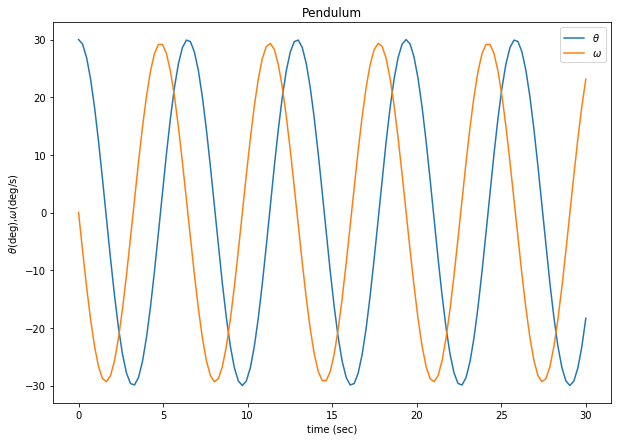

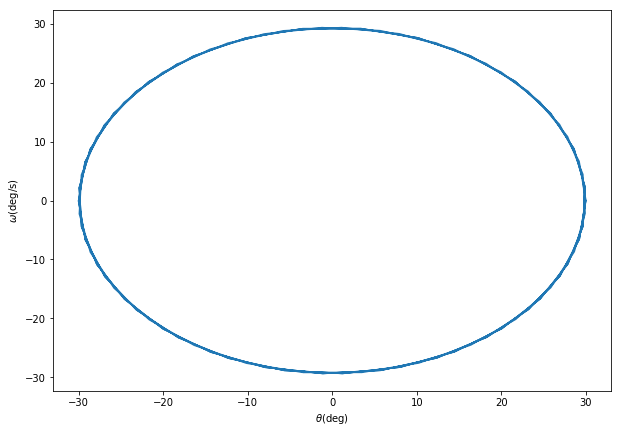

In [2]:
# Problem setup
L = 10.0
g = 9.8    # stay down to earth
parameters = [L,g]

# Initial values
theta0 = 30.0*np.pi/180.
omega0 = 0
y0 = [theta0,omega0]

# Setup the time domain for the solution. 
t_end = 30. # 30 seconds. 
N     = 128 
t = np.linspace(0.,t_end,N)

# Now ask SciPy to solve the diffeq for us.
solution = spi.odeint(pendulum,y0,t,args=(parameters,))
solutionT = np.transpose(solution)

fig1 = plt.figure(figsize=(10,7))
plt.title('Pendulum')
plt.xlabel('time (sec)')
plt.ylabel("$\\theta$(deg),$\omega$(deg/s)")
plt.plot(t,solutionT[0]*180./np.pi,label="$\\theta$")
plt.plot(t,solutionT[1]*180./np.pi,label="$\omega$")
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(10,7))
plt.plot(solutionT[0]*180./np.pi,solutionT[1]*180./np.pi)
plt.xlabel("$\\theta$(deg)")
plt.ylabel("$\omega$(deg/s)")
plt.show()

These are the expected sinusoidal results. It gets more interesting if we plot for increasing amplitudes. Note that $\theta_0= 180$ gives a stable dot, barely visible on the plot.

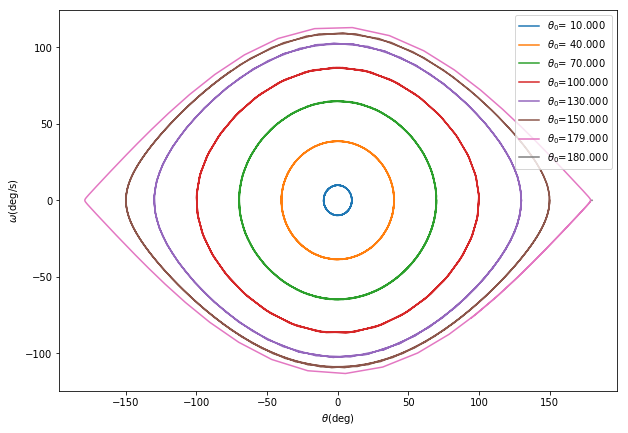

In [3]:
theta0s = np.array([10.,40.,70.,100.,130.,150.,179.,180.],dtype='float')*np.pi/180.

fig2 = plt.figure(figsize=(10,7))
for theta0 in theta0s:
    y0 = [theta0,omega0]
    solution = spi.odeint(pendulum,y0,t,args=(parameters,))
    solutionT = np.transpose(solution)
    plt.plot(solutionT[0]*180./np.pi,solutionT[1]*180./np.pi,label="$\\theta_0$={:7.3f}".format(theta0*180./np.pi))
plt.xlabel("$\\theta$(deg)")
plt.ylabel("$\omega$(deg/s)")
plt.legend()
plt.show()